# Wine Quality Classification 
---
## Varun GOR

## Classify the Wine Quality in the rank of 0 to 10, where 0 is not good and 10 is best

**Data Fields**

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
11. quality

## Loading the Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/VarunGor/Dataset/master/wine_quality-white.csv'
wine_data = pd.read_csv(url, delimiter=';')

In [21]:
print('Data Rows :', len(wine_data))
wine_data.head(5)

Data Rows : 4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Processing

In [25]:
from sklearn import preprocessing


In [56]:
col_names = list(wine_data)
y = wine_data['quality']
X = wine_data[col_names[0:-1]]

In [29]:
# 1. Using Min-Max Scaler
scaler_model = preprocessing.MinMaxScaler().fit_transform(X)
bins = np.linspace(0, 1, 10)
X_digitized = np.digitize(scaler_model, bins)

X_digitized

array([[3, 2, 2, ..., 3, 3, 2],
       [3, 2, 2, ..., 5, 3, 3],
       [4, 2, 3, ..., 5, 3, 4],
       ...,
       [3, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 6, 2, 7],
       [2, 2, 3, ..., 5, 2, 6]], dtype=int64)

In [32]:
# 2.  normalize
X_normalize = preprocessing.normalize(X)
X_normalize

array([[0.03944658, 0.00152151, 0.00202868, ..., 0.01690568, 0.00253585,
        0.04958999],
       [0.04726722, 0.00225082, 0.00255093, ..., 0.02475902, 0.00367634,
        0.07127597],
       [0.07891169, 0.00272781, 0.00389687, ..., 0.03175952, 0.00428656,
        0.09839605],
       ...,
       [0.05622854, 0.00207613, 0.0016436 , ..., 0.02586513, 0.00397925,
        0.08131512],
       [0.04878972, 0.00257255, 0.00266126, ..., 0.02962867, 0.00337093,
        0.11354698],
       [0.05918939, 0.00207163, 0.00374866, ..., 0.03215957, 0.00315677,
        0.11640581]])

In [33]:
# 3. standardize
X_standardized = preprocessing.scale(X)
X_standardized

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

## Exploratory Data Analysis (EDA)

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt

In [11]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


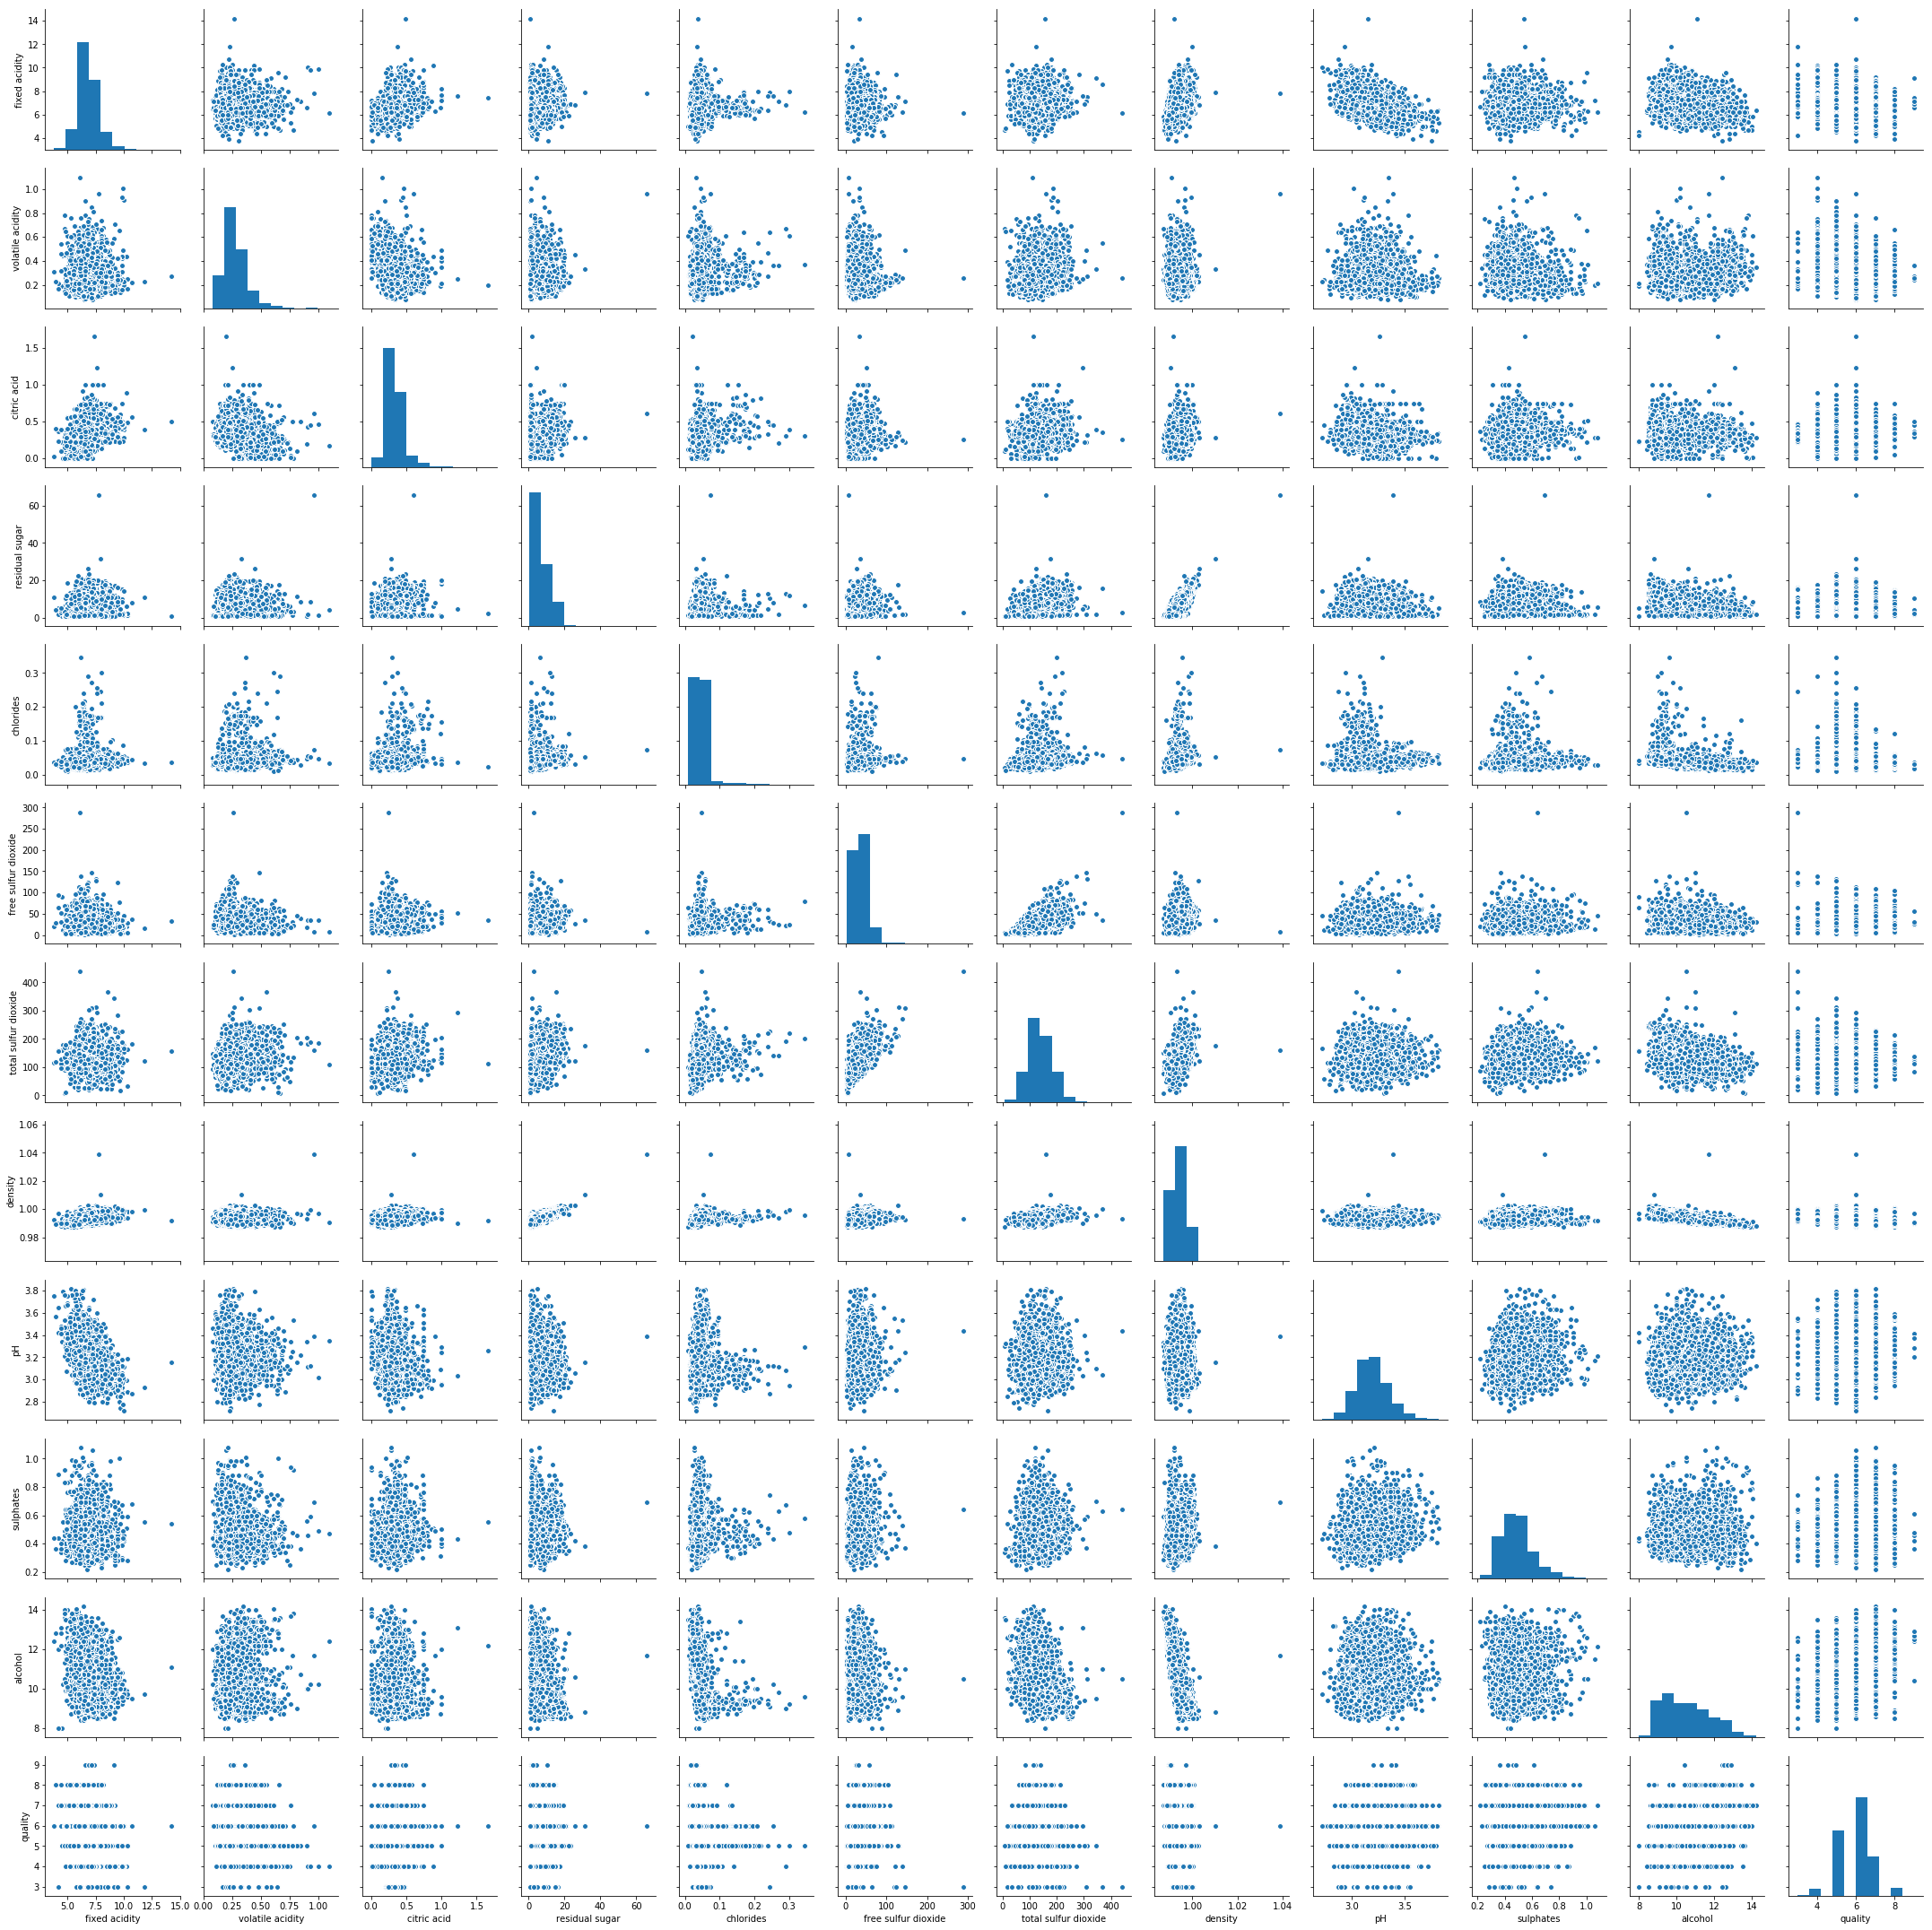

In [22]:
sb.pairplot(wine_data)

## SVM

**Simple SVM Model**

In [45]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import cross_validation 

In [40]:
model = svm.SVC(kernel='rbf', decision_function_shape='ovo')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Model Evaluation**

In [50]:
model_score = cross_validation.cross_val_score(model, X, y, cv=5)
print('Default model score :', model_score.mean())

Default model score : 0.43897656576748634


In [51]:
model_d_score = cross_validation.cross_val_score(model, X_digitized, y, cv=5)
print('Dizitized score :',model_d_score.mean())

Dizitized score 0.5171645641802995


In [53]:
model_n_score = cross_validation.cross_val_score(model, X_normalize, y, cv=5)
print('Normalized score : ',model_n_score.mean())

Normalized score :  0.44875478718156553


In [52]:
model_s_score = cross_validation.cross_val_score(model, X_standardized, y, cv=5)
print('Standardized score :',model_s_score.mean())

Standardized score : 0.5298247151621385


## Feature Engineering

In [70]:
quality_ranged = np.where(y < 6, 0, 1)

wine_data['quality_ranged'] = quality_ranged

In [69]:
wine_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_ranged
2433,7.4,0.350,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,1
4621,7.5,0.305,0.38,1.4,0.047,30.0,95.0,0.99158,3.22,0.52,11.5,7,1
824,8.4,0.180,0.42,5.1,0.036,7.0,77.0,0.99390,3.16,0.52,11.7,5,0
2075,7.6,0.180,0.36,2.4,0.049,38.0,123.0,0.99600,3.60,0.46,10.3,5,0
854,6.9,0.180,0.36,1.3,0.036,40.0,117.0,0.99340,3.27,0.95,9.5,7,1
775,6.4,0.225,0.48,2.2,0.115,29.0,104.0,0.99180,3.24,0.58,12.1,6,1
2446,6.6,0.320,0.33,2.5,0.052,40.0,210.0,0.99316,3.15,0.60,10.0,5,0
1605,7.1,0.260,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1
880,7.1,0.210,0.32,2.2,0.037,28.0,141.0,0.99300,3.20,0.57,10.0,7,1
1169,7.5,0.140,0.34,1.3,0.055,50.0,153.0,0.99450,3.29,0.80,9.6,6,1


In [74]:
y_ranged = wine_data['quality_ranged'] 

f_model = svm.SVC(kernel='rbf', decision_function_shape='ovo')
f_model.fit(X,y_ranged)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
model_s_score = cross_validation.cross_val_score(f_model, X_standardized, y_ranged, cv=5)
print('Standardized score :',model_s_score.mean())

Standardized score : 0.7543955723249464


**Model Prediction** 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized,y_ranged)

In [78]:
svm_model = svm.SVC(kernel='rbf', 
                    C=1, 
                    gamma=2**-5,
                    decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.03125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
svm_pred = svm_model.predict(X_test)

In [81]:
print("Accuracy :", metrics.accuracy_score(y_test,svm_pred))

print(metrics.classification_report(y_test,svm_pred))

Accuracy : 0.7763265306122449
             precision    recall  f1-score   support

          0       0.74      0.53      0.62       420
          1       0.79      0.91      0.84       805

avg / total       0.77      0.78      0.77      1225



**Optimize paramters using Grid Search**

In [82]:
from sklearn.grid_search import GridSearchCV

In [98]:
# Different parameters to test
params={"kernel":('linear','rbf'),
        "C":[1,10,50,100],
        "gamma":[2**-5,2**-2],
        "decision_function_shape":('ovr','ovo')
       }

In [99]:
grid_svm = svm.SVC()
grid=GridSearchCV(grid_svm, params)
grid_model=grid.fit(X_standardized,y_ranged)

In [100]:
grid_model.score

<bound method BaseSearchCV.score of GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10, 50, 100], 'gamma': [0.03125, 0.25], 'decision_function_shape': ('ovr', 'ovo')},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)>

In [101]:
grid_model.best_params_

{'C': 1, 'decision_function_shape': 'ovr', 'gamma': 0.03125, 'kernel': 'rbf'}

In [102]:
svm_opt_model = svm.SVC(C=1, 
                        decision_function_shape='ovr',
                        gamma=0.03125,
                        kernel='rbf')

svm_opt_model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
svm_opt_pred = svm_model.predict(X_test)

print("Accuracy :", metrics.accuracy_score(y_test,svm_opt_pred))

print(metrics.classification_report(y_test,svm_opt_pred))

Accuracy : 0.7763265306122449
             precision    recall  f1-score   support

          0       0.74      0.53      0.62       420
          1       0.79      0.91      0.84       805

avg / total       0.77      0.78      0.77      1225



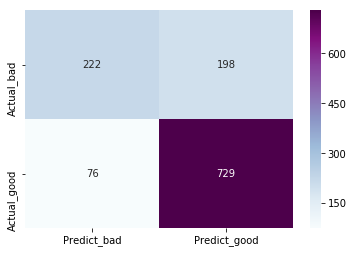

In [104]:
conf =  metrics.confusion_matrix(y_test, svm_opt_pred)

sb.heatmap(conf, cmap ='BuPu', annot=True, fmt='d', xticklabels=['Predict_bad', 'Predict_good'], yticklabels=['Actual_bad','Actual_good'])